### Imports

In [6]:
#Imports
import re
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from vectorization import hash_vectorizer
from vectorization import vectorizer
from vectorization import term_freq_vectorizer

In [7]:
# Imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

### Functions

In [8]:
#Functions

# One hot encoding ##############################

def onehote(sequence):
    mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    seq2 = [mapping[i] for i in sequence]
    return np.eye(4,dtype=int)[seq2]
#One hot encoding on a list
def seq_encoding(list):
    return np.array([onehote(i) for i in list])
#Dataframe column tolist().
def toList(dataframe,column_name):
    return dataframe[column_name].tolist()

#################################################

# One hot encoding on chirality #################

#Get integers from chirality string
def toInt(chirality_string):
    buff = re.split(r"[();]",chirality_string)
    return [int(buff[1]),int(buff[2])]

#Get the chirality from the list of chirality strings
def getChirality(chirality_list):
    return np.array([toInt(i) for i in chirality_list])

#Onehot encode the chirality number
def onehot_chirality(number):
    return np.eye(12,dtype=int)[number]
#Onehot encode the chirality
def extract_chirality(chirality):
    return np.array([onehot_chirality(i) for i in chirality])
#Apply onehot on the chirality list
def apply_chirality(chirality_list):
    return np.array([onehot_chirality(i) for i in chirality_list])

#################################################

# Misc ##########################################

#Flatten the array
def Flatten(list):
    return np.array([list[i].flatten() for i in range(len(list))])

#Make a tuple with index and value from a list
def make_tuple(list):
    return [(i+1,list[i]) for i in range(len(list))]
#Make a tuple from two lists
def make_tuple2(list1,list2):
    if(len(list1) != len(list2)):
        print("Error: Lists are not the same length")
        return None
    return [(list1[i],list2[i]) for i in range(len(list1))]
#################################################

### Model

In [9]:
def mymodel():
    model = lm.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    return model

### Data Import

In [10]:
# Load the data
set_raw = pd.read_csv('../Data/training_set.csv', low_memory=False)
# Change 'N' and 'Y' to 0 and 1
set_raw['Label'] = set_raw['Label'].apply(lambda x: 1 if x == 'Y' else 0)
# Preprocess the data
# Chirality
chirality = getChirality(set_raw['Chirality'])
chirality = pd.DataFrame(chirality, columns=['m','n'])

In [11]:
# Chirality
chirality = getChirality(set_raw['Chirality'])
chirality = pd.DataFrame(chirality, columns=['m','n'])
# # Change chiralities to parameter k = m-2n.
# chirality['k'] = chirality['m'] - 2*chirality['n']
# # Remove the chirality columns
# chirality.drop(['m','n'], axis=1, inplace=True)


### Count Vectorizer

In [12]:
# Transform
# Sequences
seq = vectorizer.transform(set_raw['Sequence'])
seq = pd.DataFrame(seq.toarray(), columns=vectorizer.get_feature_names_out())
# Merge the dataframes
set = pd.concat([seq,chirality,set_raw['Label']],axis=1)
set.sample(5)

,c,cc,ccc,cct,ct,ctc,ctt,t,tc,tcc,tct,tt,ttc,ttt,m,n,Label
539,6,2,0,2,4,2,1,6,4,2,2,1,1,0,11,0,0
46,5,0,0,0,5,3,1,7,5,0,5,1,1,0,9,7,0
701,4,0,0,0,3,2,1,8,3,0,2,5,1,4,9,9,0
731,6,0,0,0,5,4,1,6,5,0,4,1,1,0,11,0,0
653,4,0,0,0,3,0,3,8,3,0,2,5,3,2,9,9,0


In [13]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(set.drop('Label',axis=1),
                                                    set['Label'],
                                                    test_size=0.2, shuffle=True,
                                                    random_state=42)
# Model training
model = mymodel()
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy of the model is: 0.9743589743589743


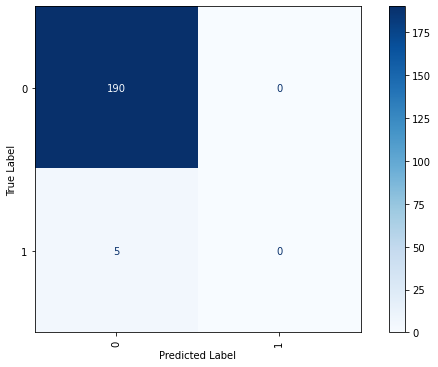

In [29]:
predictions = model.predict(X_test)
print('Accuracy of the model is: {}'.format(accuracy_score(Y_test, predictions)))
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_test, predictions))
matrix.plot(cmap=plt.cm.Blues, include_values=True, xticks_rotation='vertical')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(10,6)

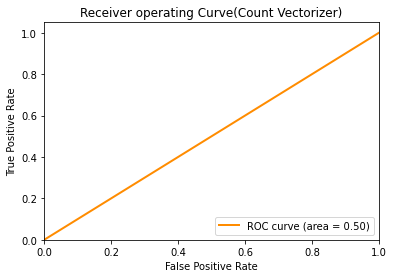

In [28]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve(Count Vectorizer)')
plt.legend(loc="lower right")
plt.show()

### Hash Vectorizer
#### DO NOT RUN THIS CODE SNIPPET UNLESS YOU HAVE 16GB OF RAM

In [16]:
# Transform
# Sequences
seq_hash = hash_vectorizer.transform(set_raw['Sequence'])
seq_hash = pd.DataFrame(seq_hash.toarray())
# Remove columns with all zeros
seq_hash = seq_hash.loc[:, (seq_hash != 0).any(axis=0)]

In [17]:
# Merge the dataframes
set_hash = pd.concat([seq_hash,chirality,set_raw['Label']],axis=1)
set_hash.sample(5)

,468425,532659,533825,539482,552695,694262,723874,772663,801063,811211,862625,992385,1023064,1038787,m,n,Label
390,-0.178885,-0.536656,0.178885,-0.268328,-0.178885,-0.357771,0.178885,0.000000,0.000000,0.000000,-0.536656,0.178885,0.178885,-0.178885,7,3,0
60,-0.086711,-0.606977,0.000000,-0.173422,-0.086711,-0.086711,0.086711,-0.260133,-0.260133,0.086711,-0.433555,0.346844,0.000000,-0.346844,10,2,0
844,-0.163846,-0.327693,0.000000,0.000000,0.000000,-0.245770,0.163846,-0.327693,-0.163846,0.000000,-0.655386,0.327693,0.000000,-0.327693,9,6,0
477,-0.079809,-0.478852,0.000000,0.000000,0.000000,-0.079809,0.079809,-0.319235,-0.319235,0.000000,-0.478852,0.399043,0.000000,-0.399043,8,8,0
766,-0.240966,-0.321288,0.000000,0.000000,0.000000,-0.240966,0.240966,-0.321288,0.000000,0.000000,-0.642575,0.321288,0.000000,-0.321288,9,7,0


In [18]:
# Train test split
X_train_hash, X_test_hash, Y_train_hash, Y_test_hash = train_test_split(set_hash.drop('Label',axis=1),
                                                                                        set_hash['Label'],
                                                                                        test_size=0.2,
                                                                                        random_state=42)
# Model training
model_hash = mymodel()
model_hash.fit(X_train_hash,Y_train_hash)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accurace of the model is: 0.9743589743589743


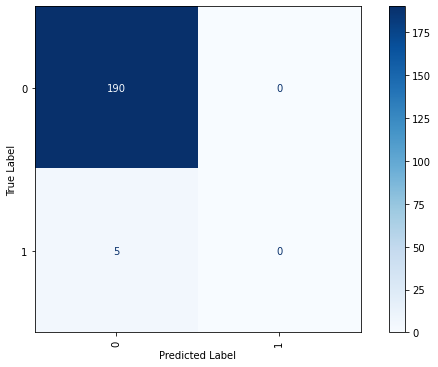

In [19]:
predictions_hash = model.predict(X_test_hash)
print('Accurace of the model is: {}'.format(accuracy_score(Y_test_hash, predictions)))
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_test_hash, predictions_hash))
matrix.plot(cmap=plt.cm.Blues, include_values=True, xticks_rotation='vertical')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(10,6)

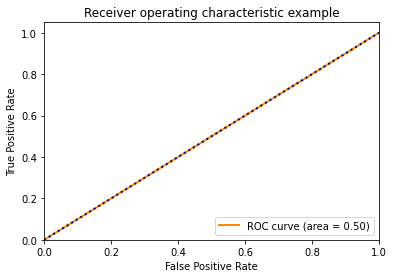

In [20]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_hash, predictions_hash)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Tfidf Vectorizer

In [21]:
# Transform
# Sequences
seq_tfidf = term_freq_vectorizer.transform(set_raw['Sequence'])
seq_tfidf = pd.DataFrame(seq_tfidf.toarray(), columns=term_freq_vectorizer.get_feature_names_out())
# Merge the dataframes
set_tfidf = pd.concat([seq_tfidf,chirality,set_raw['Label']],axis=1)
set_tfidf.head()

,c,cc,ccc,cct,ct,ctc,ctt,t,tc,tcc,tct,tt,ttc,ttt,m,n,Label
0,0.371174,0.085089,0.0,0.09028,0.31172,0.371297,0.0,0.519644,0.302763,0.088509,0.418401,0.195654,0.099841,0.137737,10,2,0
1,0.371174,0.085089,0.0,0.09028,0.31172,0.371297,0.0,0.519644,0.302763,0.088509,0.418401,0.195654,0.099841,0.137737,10,3,0
2,0.371174,0.085089,0.0,0.09028,0.31172,0.371297,0.0,0.519644,0.302763,0.088509,0.418401,0.195654,0.099841,0.137737,11,1,0
3,0.371174,0.085089,0.0,0.09028,0.31172,0.371297,0.0,0.519644,0.302763,0.088509,0.418401,0.195654,0.099841,0.137737,8,5,0
4,0.371174,0.085089,0.0,0.09028,0.31172,0.371297,0.0,0.519644,0.302763,0.088509,0.418401,0.195654,0.099841,0.137737,9,6,0


In [22]:
# Train test split
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(set_tfidf.drop('Label',axis=1),
                                                                                        set_tfidf['Label'],
                                                                                        test_size=0.2,
                                                                                        random_state=42)
# Model training
model_tfidf = mymodel()
model_tfidf.fit(X_train_tfidf,Y_train_tfidf)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Accurace of the model is: 0.9743589743589743


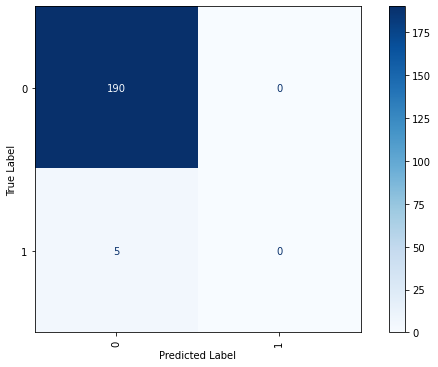

In [23]:
predictions_tfidf = model.predict(X_test_tfidf)
print('Accurace of the model is: {}'.format(accuracy_score(Y_test_tfidf, predictions)))
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_test_tfidf, predictions_tfidf))
matrix.plot(cmap=plt.cm.Blues, include_values=True, xticks_rotation='vertical')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(10,6)

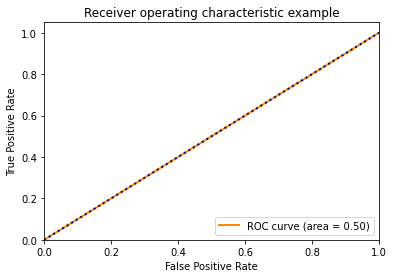

In [24]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_hash, predictions_tfidf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()